In [61]:
import os
import pandas as pd
os.chdir('/Users/yehhsuan-yu/Umich/Stats503/project')
train = pd.read_csv('train.csv').fillna(' ')
test = pd.read_csv('test.csv').fillna(' ')

# Countvector

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
df=train.append(test,ignore_index=True)
text=df["comment_text"]

word_vectorizer=CountVectorizer(
    #sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    #token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=100)
# tokenize and build vocab
word_vectorizer.fit(text)

features = word_vectorizer.transform(df['comment_text'])

In [5]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
search_params = {'n_components': range(1,26)}

# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online',learning_offset=10.,random_state=0)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
model.fit(features)

GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_components': range(1, 26)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [65]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=99, n_iter=7, random_state=10).fit(features) 
print(np.cumsum(svd.explained_variance_ratio_))


[0.11759466 0.22280863 0.31569912 0.38678803 0.45393411 0.51858412
 0.58320173 0.63988468 0.69331049 0.73263782 0.76794984 0.7965847
 0.8191653  0.84157167 0.8622358  0.8824327  0.89525014 0.90747456
 0.91738298 0.92681933 0.93369577 0.9403408  0.94606837 0.95147532
 0.95632662 0.96117842 0.96564862 0.96924873 0.97279794 0.97614257
 0.97903463 0.98162692 0.98351962 0.98527339 0.98675905 0.98813498
 0.98934556 0.99022246 0.99101633 0.99158123 0.99213817 0.99265562
 0.99308524 0.99348633 0.9938718  0.99420886 0.99449112 0.99474999
 0.99499038 0.99521706 0.99543345 0.99564407 0.99584402 0.99603562
 0.99622241 0.99639053 0.99655846 0.99671995 0.99687056 0.99701989
 0.99716299 0.99728841 0.99740458 0.9975198  0.99763321 0.99774413
 0.99785082 0.99795139 0.99804926 0.99814472 0.99823761 0.99832492
 0.99841087 0.99849288 0.99857216 0.99865109 0.9987269  0.99880055
 0.99887223 0.99894336 0.99901247 0.99907801 0.99914328 0.99920713
 0.99926927 0.99933053 0.99939132 0.99944929 0.9995059  0.99956

In [72]:
import pandas as pd
svd = TruncatedSVD(n_components=13, n_iter=7, random_state=10).fit(features)
X_scores = svd.transform(features)
X_scores.shape
X_scores_df = pd.DataFrame(X_scores)
X_scores_df.to_csv('LSA_scores.csv')
tox = pd.DataFrame(df['toxic'])
tox.to_csv('toxic.csv')

In [6]:
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(features))

Best Model's Params:  {'n_components': 21}
Best Log Likelihood Score:  -103592.98434843805
Model Perplexity:  41.775228875857515


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


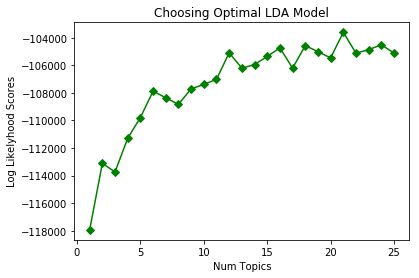

In [28]:
import matplotlib.pyplot as plt
n_topics=range(1,26)
log_likelyhoods = [round(gscore.mean_validation_score) for gscore in model.grid_scores_]
fig = plt.figure()
#plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods, '-gD')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.show()
fig.savefig('lda_score.eps', format='eps', dpi=1000)

In [12]:
lda = LatentDirichletAllocation(n_components=21, max_iter=5, learning_method='online', learning_offset=10.,random_state=0).fit(features)
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, features, word_vectorizer, mds='tsne')
panel

KeyboardInterrupt: 

In [13]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, features, word_vectorizer, mds='tsne')
panel

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics           x           y
topic                                                   
12     8.798853        1       1  -23.022570 -563.494934
7      7.620247        1       2 -158.347290  168.859833
8      7.250226        1       3  122.359299 -171.783081
6      6.969467        1       4   16.000746  186.272278
10     6.396804        1       5  210.607697  263.010376
3      6.076823        1       6  438.633179  -41.297443
0      5.864957        1       7 -212.502060 -360.208374
4      5.752344        1       8   60.027905  384.570862
2      5.189827        1       9    2.141931   -4.239467
17     4.590225        1      10   -7.812203 -359.376251
14     4.171505        1      11  -43.085499 -175.285797
11     4.154780        1      12  252.661926  -64.612518
9      4.135187        1      13  360.213470  149.087494
15     4.099249        1      14 -213.859268 -174.830811
13     4.075027        1      15 -349.361847  121.752518
19     3.716256        1      16 -386.868439  -97.491165
20     3.038821        1      17  156.390396   72.428200
18     2.518377        1      18 -173.620483   -1.789526
1      1.989496        1      19  342.962341 -245.899963
5      1.901228        1      20 -162.976608  354.202759
16     1.690302        1      21  183.079407 -364.239502, topic_info=     Category         Freq       Term        Total  loglift  logprob
term                                                                
33    Default  3839.000000       fuck  3839.000000  30.0000  30.0000
97    Default  2631.000000  wikipedia  2631.000000  29.0000  29.0000
37    Default  1727.000000       hate  1727.000000  28.0000  28.0000
41    Default  1448.000000         hi  1448.000000  27.0000  27.0000
56    Default  1399.000000      moron  1399.000000  26.0000  26.0000
49    Default  1852.000000       like  1852.000000  25.0000  25.0000
60    Default  1963.000000       page  1963.000000  24.0000  24.0000
2     Default  2292.000000    article  2292.000000  23.0000  23.0000
90    Default  1236.000000       user  1236.000000  22.0000  22.0000
31    Default  1538.000000        fat  1538.000000  21.0000  21.0000
82    Default  1551.000000       talk  1551.000000  20.0000  20.0000
19    Default  1085.000000        die  1085.000000  19.0000  19.0000
24    Default  1368.000000        don  1368.000000  18.0000  18.0000
93    Default  1004.000000     wanker  1004.000000  17.0000  17.0000
7     Default   784.000000   bastered   784.000000  16.0000  16.0000
45    Default   846.000000        jew   846.000000  15.0000  15.0000
74    Default   922.000000        sex   922.000000  14.0000  14.0000
59    Default   978.000000     nigger   978.000000  13.0000  13.0000
47    Default  1149.000000       know  1149.000000  12.0000  12.0000
26    Default   923.000000       edit   923.000000  11.0000  11.0000
46    Default  1493.000000       just  1493.000000  10.0000  10.0000
34    Default   883.000000    fucking   883.000000   9.0000   9.0000
32    Default   756.000000    freedom   756.000000   8.0000   8.0000
8     Default   747.000000       best   747.000000   7.0000   7.0000
4     Default   963.000000        ass   963.000000   6.0000   6.0000
78    Default   711.000000       stop   711.000000   5.0000   5.0000
1     Default   703.000000       aids   703.000000   4.0000   4.0000
86    Default   993.000000      think   993.000000   3.0000   3.0000
96    Default   668.000000       wiki   668.000000   2.0000   2.0000
9     Default   604.000000      bitch   604.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
66    Topic21     0.070870      piece   371.279487  -4.4836  -9.7729
15    Topic21     0.070842    deleted   378.050804  -4.5021  -9.7733
40    Topic21     0.070842        hey   379.493616  -4.5059  -9.7733
53    Topic21     0.070842       look   390.791857  -4.5352  -9.7733
39    Topic21     0.070842       help   403.957544  -4.5683  -9.7733
99    Topic21     0.0709

In [60]:
best_lda_model = model.best_params_
#print(best_lda_model.n_topics)

AttributeError: 'dict' object has no attribute 'n_topics'

In [59]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(features)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_topics)]

# index names
docnames = ["Doc" + str(i) for i in range(len(features))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

AttributeError: 'dict' object has no attribute 'transform'

In [45]:
import numpy as np
def show_topics(vectorizer=word_vectorizer_tfidf, lda_model=nmf, n_words=5):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=word_vectorizer_tfidf, lda_model=nmf, n_words=5)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

AttributeError: 'numpy.ndarray' object has no attribute 'components_'

# Tfidfvector

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
text=df["comment_text"]

word_vectorizer_tfidf=TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    #token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=100)
word_vectorizer_tfidf.fit(text)

features_tfidf = word_vectorizer_tfidf.transform(df['comment_text'])

In [34]:
from sklearn.decomposition import NMF
from sklearn.model_selection import GridSearchCV
search_params = {'n_components': range(1,26)}

# Init the Model
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)


# Init Grid Search Class
model_tfidf = GridSearchCV(lda, param_grid=search_params)
model_tfidf.fit(features_tfidf)

GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_components': range(1, 26)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [35]:
best_lda_model = model_tfidf.best_estimator_
# Model Parameters
print("Best Model's Params: ", model_tfidf.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model_tfidf.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(features_tfidf))

Best Model's Params:  {'n_components': 1}
Best Log Likelihood Score:  -24351.89728854084
Model Perplexity:  81.64156689176045


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


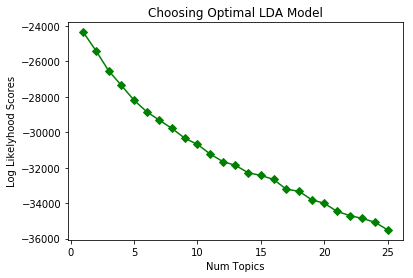

In [36]:
import matplotlib.pyplot as plt
n_topics=range(1,26)
log_likelyhoods = [round(gscore.mean_validation_score) for gscore in model_tfidf.grid_scores_]
fig = plt.figure()
#plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods, '-gD')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.show()
#fig.savefig('lda_tfidf_score.png', format='png', dpi=1000)

In [38]:
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(features_tfidf)
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, features_tfidf, word_vectorizer_tfidf, mds='tsne')
panel

ValueError: Expected n_neighbors > 0. Got 0

In [43]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=21, random_state=1).fit_transform(features_tfidf)
labels = nmf.argmax(axis=1)

In [44]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print "Topic %d:" % (topic_idx)
        print " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])

no_top_words = 5
tfidf_feature_names = 
display_topics(nmf, tfidf_feature_names, no_top_words)

array([ 0,  3, 20, ..., 12, 17,  8])